In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [192]:
db = pd.read_csv("./diabetes(1).csv")
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [193]:
# Check if there is non-unique or duplicate values
db = db.drop_duplicates(keep='first', ignore_index=True)
# Check if there is any of the columns has NA value
db.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [194]:
#Shape of the dataset
db.shape

(768, 9)

Outcome
0    500
1    268
Name: count, dtype: int64


Text(0.5, 1.0, 'Bar Histogram of Outcome Variable Counts')

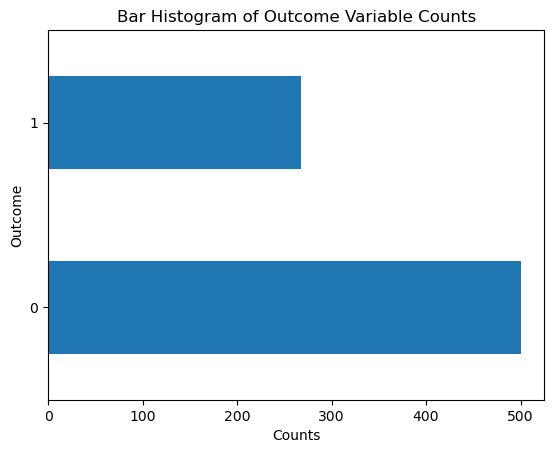

In [195]:
counts = db['Outcome'].value_counts()
print(counts)
counts.sort_index().plot(kind='barh', xlabel="Counts")
plt.title("Bar Histogram of Outcome Variable Counts")

In [196]:
#Check unique values
variables = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
for i in variables:
    print(db[i].unique())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
[  0  94 168  88 543 846 175 230  83  96 235 

In [197]:
# Check 0 values per predicator
variables = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in variables:
    c = 0
    for x in (db[i]):
        if x == 0:
             c = c + 1
    print(i, c)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


In [198]:
# To check descriptive statistics
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [199]:
#To check missing values
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Proportion of Diabetes Outcome')

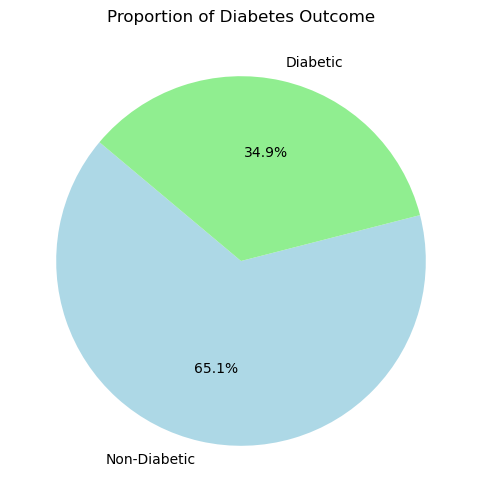

In [200]:
outcome_counts = db['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Diabetes Outcome')


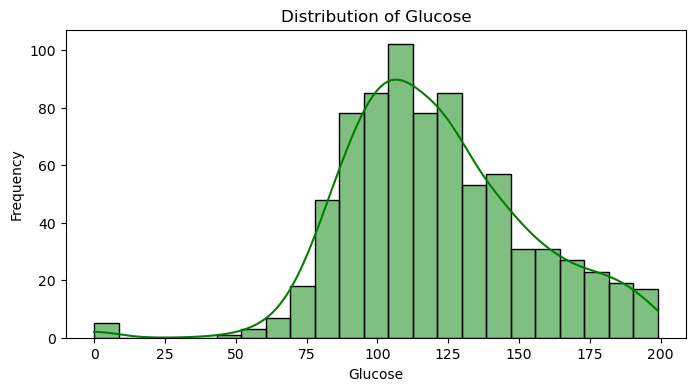

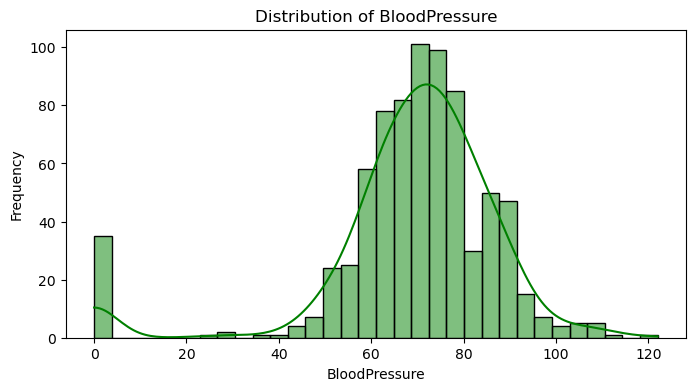

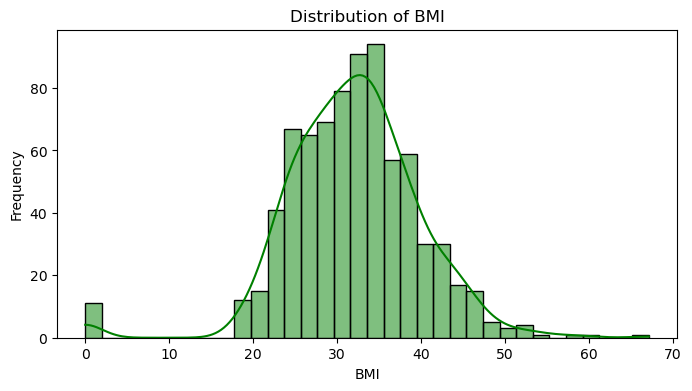

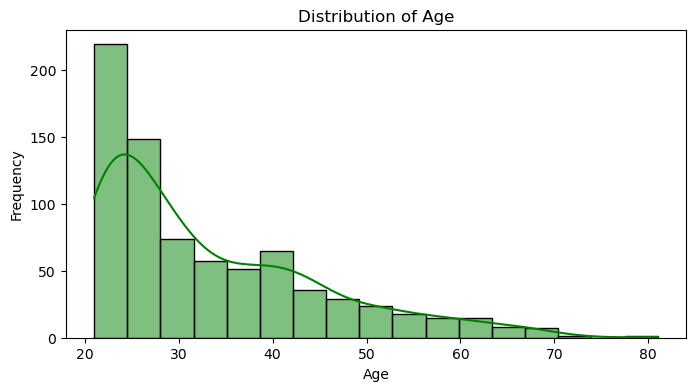

In [201]:
# Using histograms for continuous variables
continuous_vars = ['Glucose', 'BloodPressure', 'BMI', 'Age']
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(db[var], kde=True, color='green')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')


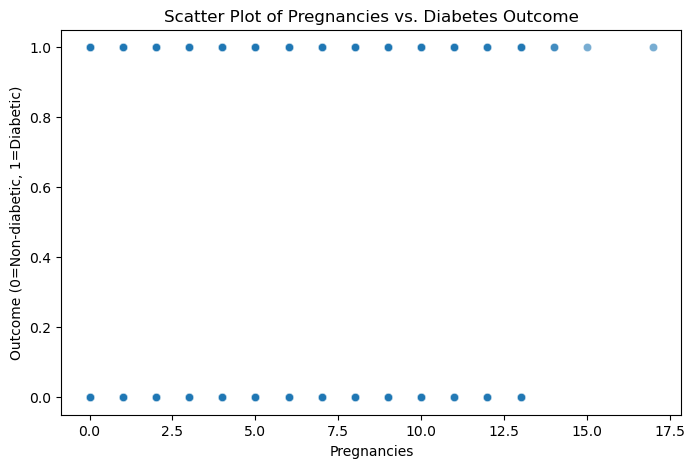

In [202]:
# Using scatter plots to see relationships with Outcome
binary_vars = ['Pregnancies', 'Outcome']
for var in binary_vars[:-1]:  # Excluding 'Outcome' itself from the x-axis variables
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=db, x=var, y='Outcome', alpha=0.6)
    plt.title(f'Scatter Plot of {var} vs. Diabetes Outcome')
    plt.xlabel(var)
    plt.ylabel('Outcome (0=Non-diabetic, 1=Diabetic)')


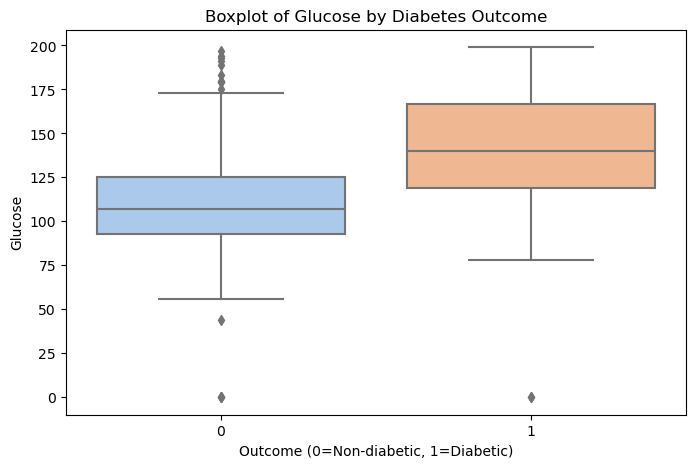

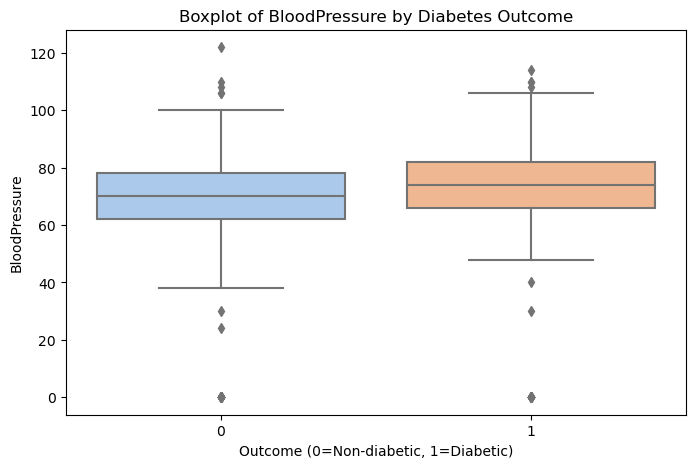

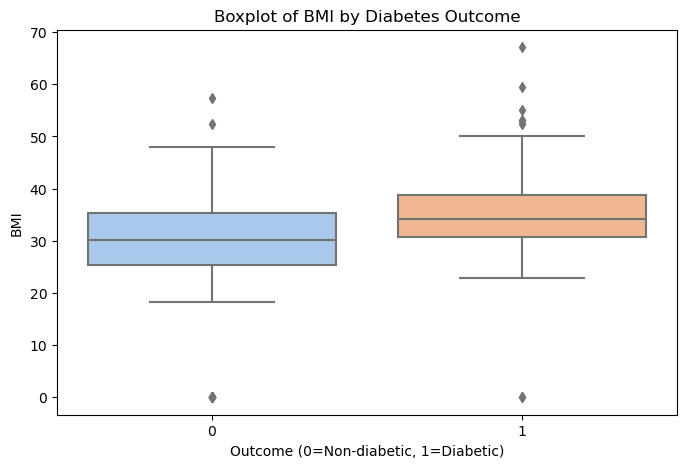

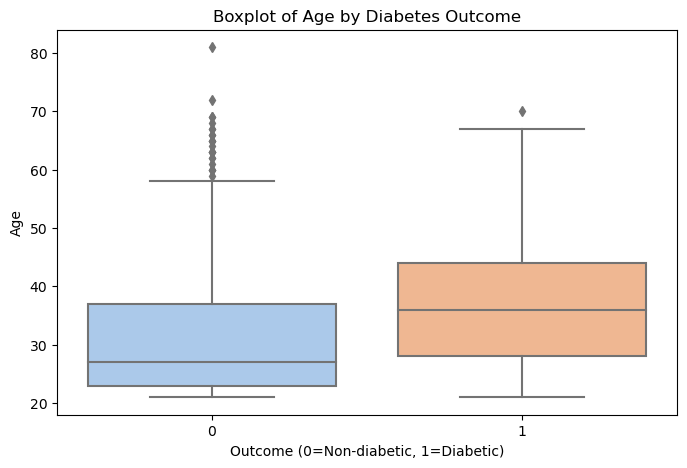

In [203]:
# Boxplots for comparing distribution by Outcome
for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Outcome', y=var, data=db, palette='pastel')
    plt.title(f'Boxplot of {var} by Diabetes Outcome')
    plt.xlabel('Outcome (0=Non-diabetic, 1=Diabetic)')
    plt.ylabel(var)

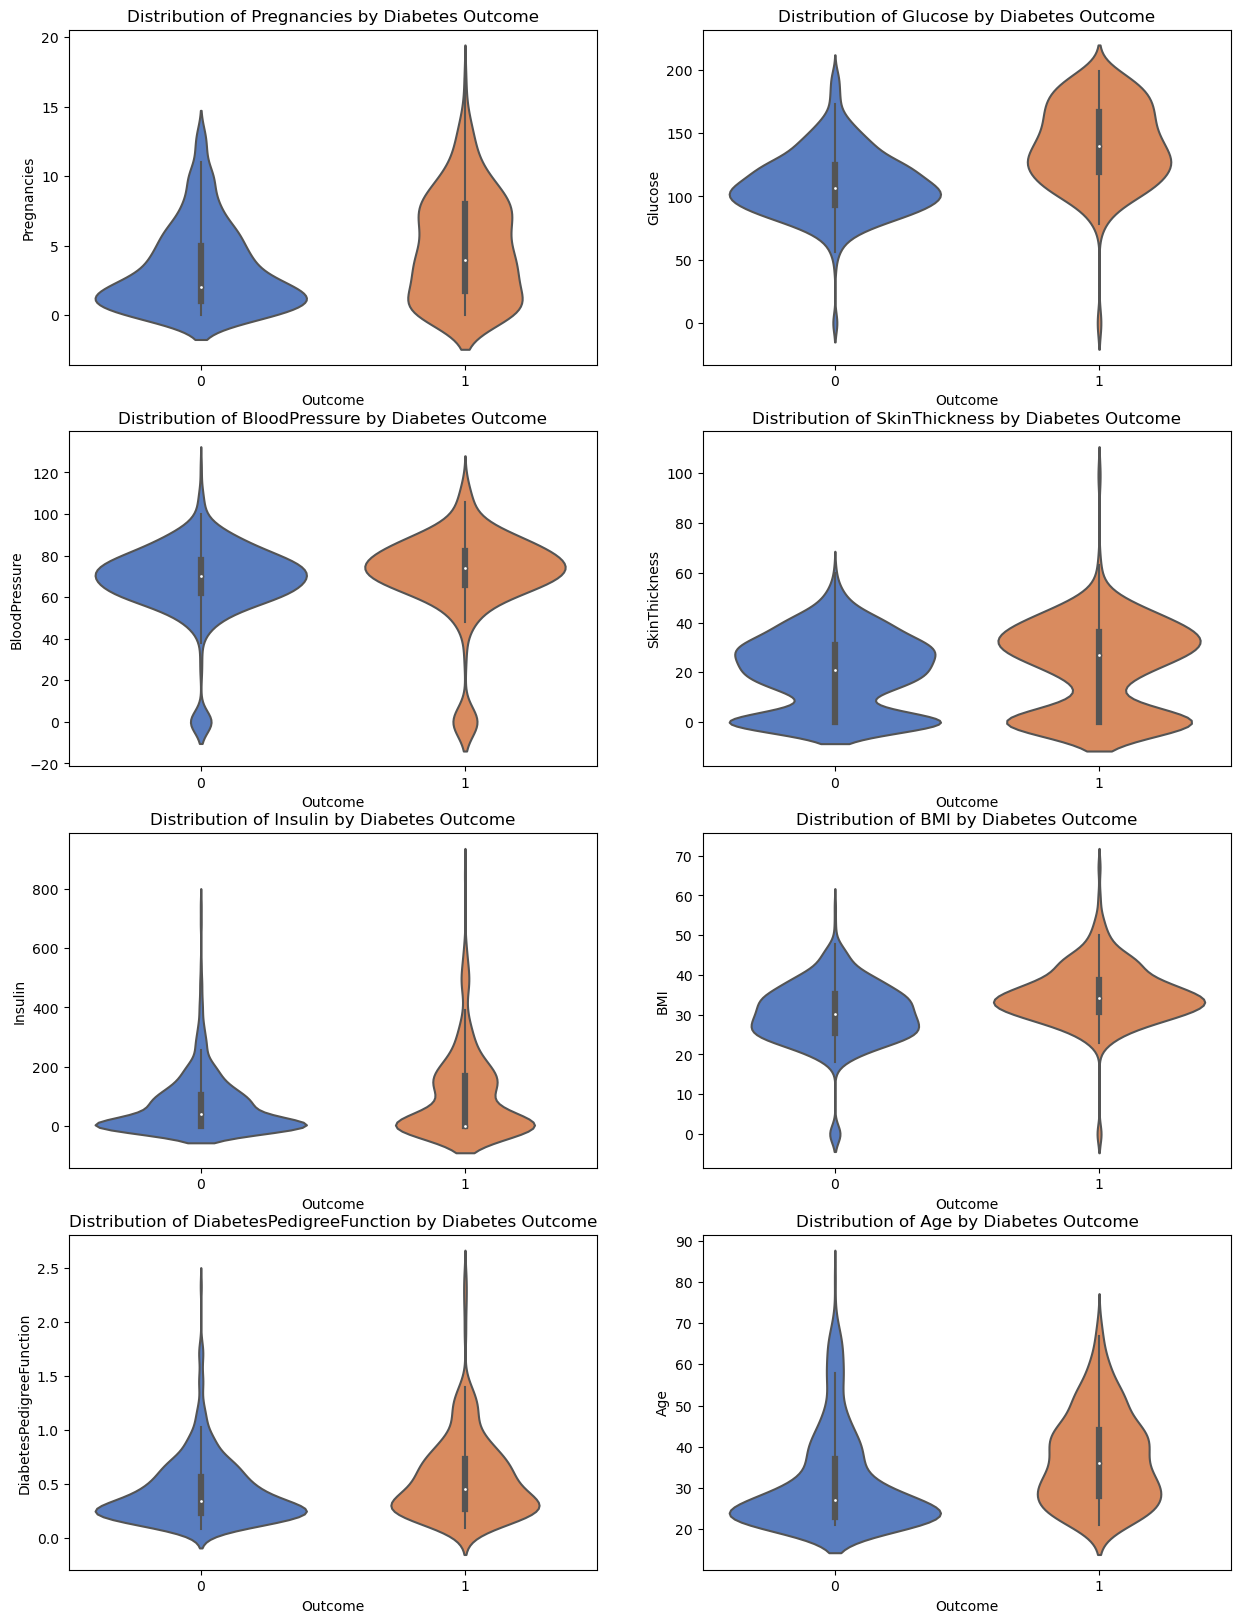

In [204]:
# To visual the distribution of each variable by outcome
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
for i, var in enumerate(variables):
    sns.violinplot(data=db, x='Outcome', y=var, ax=axes[i//2, i%2], palette="muted")
    axes[i//2, i%2].set_title(f"Distribution of {var} by Diabetes Outcome")

Text(0.5, 1.0, 'Correlation of Variables with Diabetes Outcome')

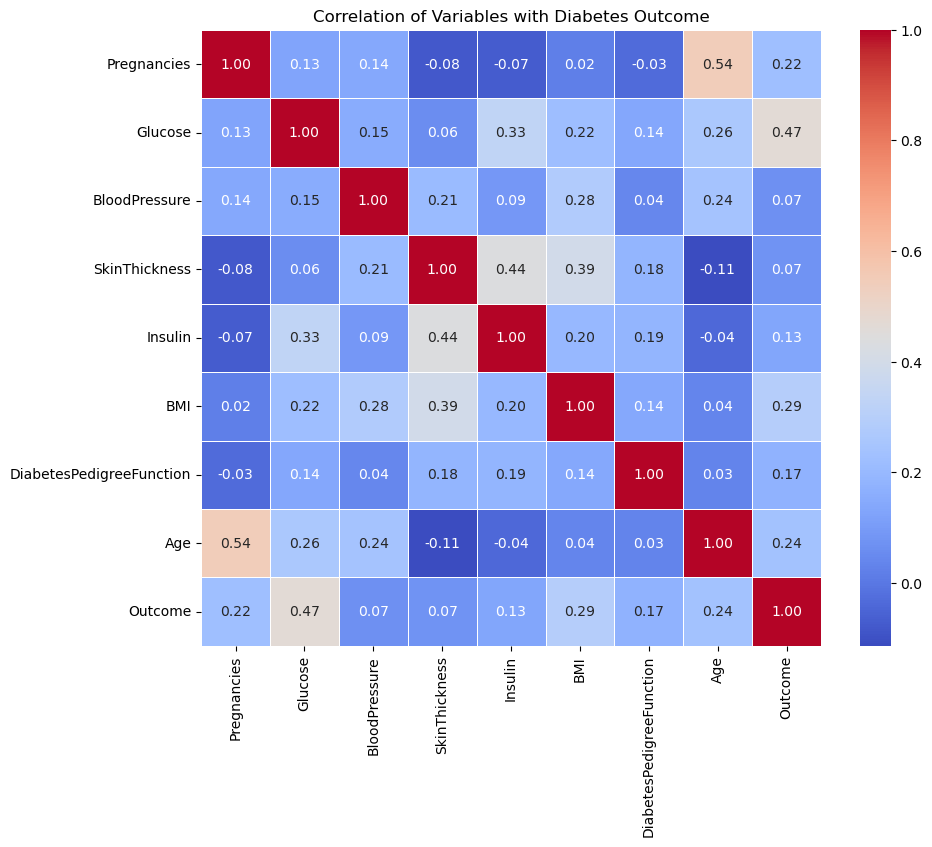

In [205]:
# Using Heatmap to identify correlations between variables and the outcome
plt.figure(figsize=(10, 8))
sns.heatmap(db.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation of Variables with Diabetes Outcome")

# Neural Network

In [206]:
# import libraries
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix,  mean_squared_error
from sklearn.neural_network import MLPClassifier 
from sklearn. feature_selection import RFE
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

In [207]:

db_nn = db[['Outcome', 'BMI', 'BloodPressure', 'Age', 'Glucose', 'DiabetesPedigreeFunction']]

x = db_nn.drop('Outcome', axis = 1)
y = db_nn['Outcome']

# smote = SMOTE(random_state = 1)
# x, y = smote.fit_resample(x, y)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [208]:
mlp = MLPClassifier(hidden_layer_sizes = (15, 10),
                    learning_rate_init = 0.001,
                    max_iter = 1000,
                    activation = 'relu',
                    solver = 'adam',
                    # solver = 'sgd',
                    batch_size = 100,
                    random_state = 1)

mlp.fit(xtrain, ytrain)
pred = mlp.predict(xtest)

In [209]:
print(classification_report(ytest, pred,
                            digits = 4,
                            target_names = ["0", "1"],
                            zero_division = 1))

              precision    recall  f1-score   support

           0     0.7627    0.9375    0.8411        48
           1     0.8333    0.5172    0.6383        29

    accuracy                         0.7792        77
   macro avg     0.7980    0.7274    0.7397        77
weighted avg     0.7893    0.7792    0.7647        77



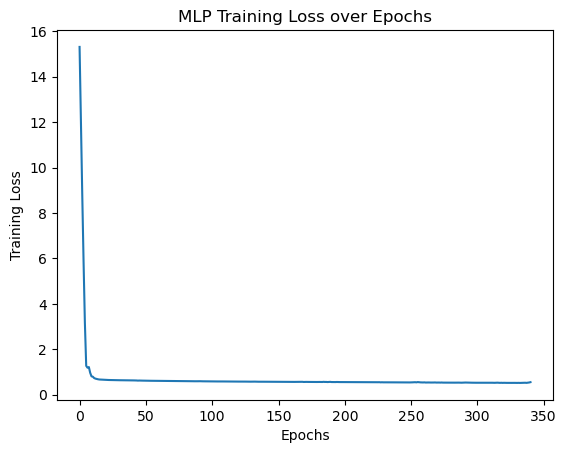

In [210]:
plt.plot(mlp.loss_curve_)
plt.title('MLP Training Loss over Epochs')
plt.xlabel ('Epochs' )
plt.ylabel('Training Loss')
plt.show()

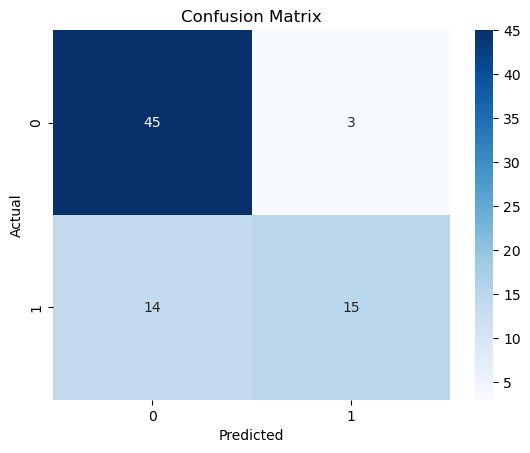

In [211]:
cm = confusion_matrix(ytest, pred) # It's a 2x2 matrix with the actual values on the y-axis and the predicted values on the x-axis. And the values in the matrix are the counts of the observations that fall into each category. And the diagonal of the matrix is the number of correct predictions. And the off-diagonal is the number of incorrect predictions.
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # font size
plt.title('Confusion Matrix') 
plt.xlabel ('Predicted')
plt.ylabel('Actual')
plt.show( )

# XGBoost

In [212]:
xgb_clf = xgb.XGBClassifier(n_estimators = 90, learning_rate = 0.35, 
                            max_depth = 3, seed = 1)
xgb_clf.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.35, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [213]:
pred = xgb_clf.predict(xtest)
print(xtest.head(10))
print(pred)

      BMI  BloodPressure  Age  Glucose  DiabetesPedigreeFunction
285  26.0             74   51      136                     0.647
101  26.1             60   22      151                     0.179
581  25.0             60   27      109                     0.206
352  34.4             82   46       61                     0.243
726  36.1             78   25      116                     0.496
472  38.8             66   22      119                     0.259
233  35.0             68   29      122                     0.394
385  22.3             54   24      119                     0.205
556  38.1             70   30       97                     0.218
59   41.5             64   22      105                     0.173
[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0
 1 0 1]


In [214]:
print(f'Training MSE: {round(mean_squared_error(xgb_clf.predict(xtrain), ytrain), 4)}')
print(f'Testing MSE: {round(mean_squared_error(pred, ytest), 4)}')

Training MSE: 0.0463
Testing MSE: 0.2078


In [215]:
print(classification_report(ytest, pred,
                            digits = 4,
                            target_names = ["No Diabetes", "Diabetes"],
                            zero_division = 1))

              precision    recall  f1-score   support

 No Diabetes     0.8200    0.8542    0.8367        48
    Diabetes     0.7407    0.6897    0.7143        29

    accuracy                         0.7922        77
   macro avg     0.7804    0.7719    0.7755        77
weighted avg     0.7901    0.7922    0.7906        77



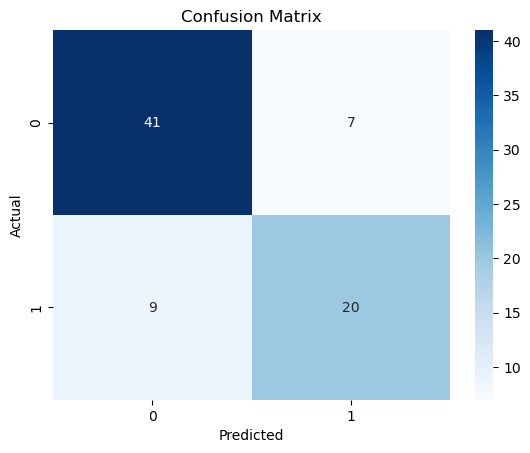

In [216]:
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()